In [1]:
import pandas as pd
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cv.__version__

'3.4.1'

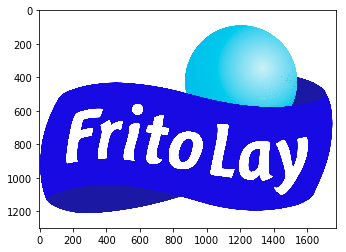

In [3]:
# Import the image
img = cv.imread('fritolay-logo.jpeg')
plt.imshow(img)

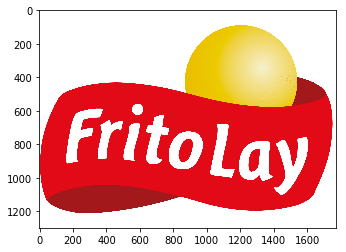

In [4]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

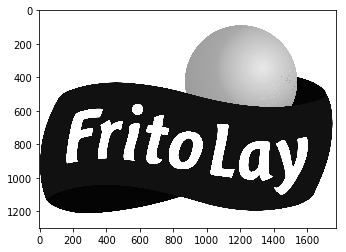

In [5]:
# Convert the image into gray scale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

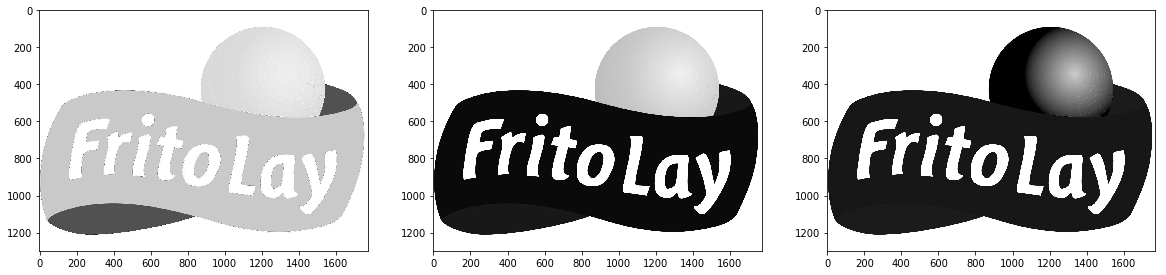

In [6]:
# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')
plt.show()

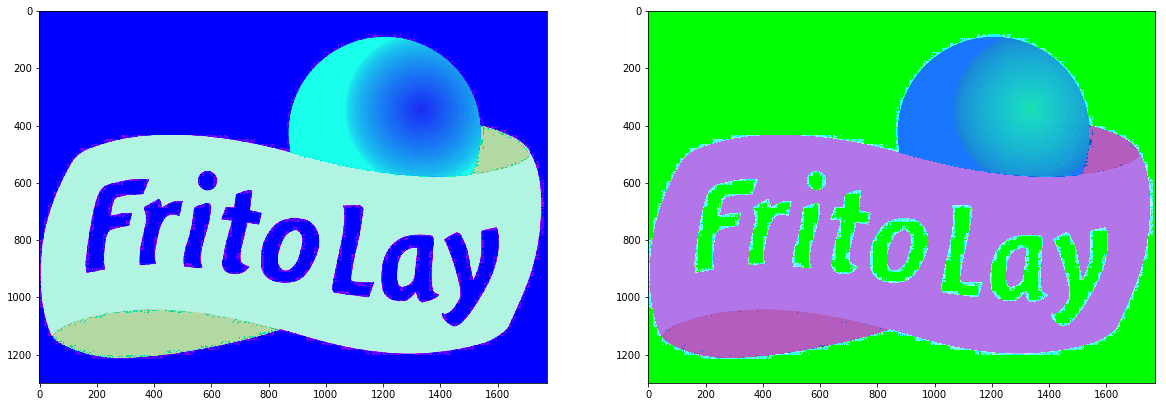

In [7]:
# Transform the image into HSV and HLS models
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
# Plot the converted images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)
plt.show()

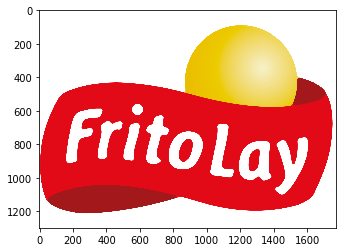

In [8]:
img_noise = cv.medianBlur(img_rgb,27)
plt.imshow(img_noise)

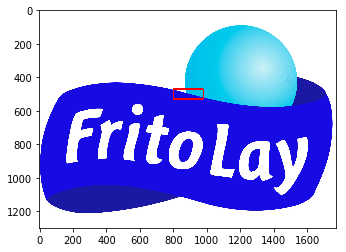

In [9]:
# Copy the image
img_copy = img.copy()
# Draw a rectangle 
cv.rectangle(img_copy, pt1 = (800, 470), pt2 = (980, 530), 
              color = (255, 0, 0), thickness = 5)
plt.imshow(img_copy)

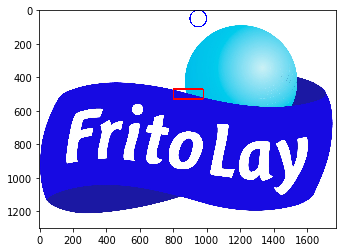

In [10]:
# Draw a circle 
cv.circle(img_copy, center = (950, 50), radius = 50, 
           color = (0, 0, 255), thickness = 5)
plt.imshow(img_copy)

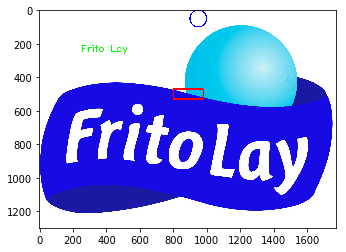

In [11]:
# Add text 
cv.putText(img_copy, text = "Frito Lay", 
            org = (250, 250),
            fontFace = cv.FONT_HERSHEY_DUPLEX, 
            fontScale = 2, 
            color = (0, 255, 0), 
            thickness = 2, 
            lineType = cv.LINE_AA)
plt.imshow(img_copy)

In [ ]:
# Step 1. Define callback function
def draw_circle(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(img, center = (x, y), radius = 5, 
                       color = (87, 184, 237), thickness = -1)
    elif event == cv.EVENT_RBUTTONDOWN:        
            cv.circle(img, center = (x, y), radius = 10,  
                       color = (87, 184, 237), thickness = 1)

In [ ]:
# Step 2. Call the window
img = cv.imread('map.png')
cv.namedWindow(winname = 'my_drawing')
cv.setMouseCallback('my_drawing', draw_circle)

In [ ]:
# Step 3. Execution
while True:
    cv.imshow('my_drawing',img)
    if cv.waitKey(10) & 0xFF == 27:
        break
cv.destroyAllWindows()